In [9]:
import xarray as xr
# import rioxarray as rio
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, MultiPolygon


In [10]:
# file_name = '../data/teste/oco2_LtCO2_190802_B10206Ar_200729204909s.nc4'

file_name = '/mnt/c/Users/Marcio/Desktop/Sat Data/OCO2_L4/OCO2GriddedXCO2_20170709_v2_1605546720.nc'
nc_file = xr.open_dataset(file_name)
nc_file

/home/mjt/miniconda3/envs/geoproc/lib/python3.9/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<xarray.Dataset>
Dimensions:                 (time: 4130, levels: 20, epoch_dimension: 7)
Coordinates:
  * time                    (time) datetime64[ns] 2017-07-09T23:06:02.0719997...
  * levels                  (levels) int16 1 2 3 4 5 6 7 ... 15 16 17 18 19 20
Dimensions without coordinates: epoch_dimension
Data variables: (12/14)
    latitude                (time) float32 ...
    longitude               (time) float32 ...
    xco2                    (time) float32 ...
    xco2_apriori            (time) float32 ...
    xco2_uncertainty        (time) float32 ...
    pressure_levels         (time, levels) float32 ...
    ...                      ...
    pressure_weight         (time, levels) float32 ...
    source_data_mode        (time) float32 ...
    date                    (time, epoch_dimension) float32 ...
    decorrelation_distance  (time) float64 ...
    land_inflation_factor   float64 ...
    ocean_inflation_factor  float64 ...
Attributes: (12/15)
    title:                          OCO-2 Gridded Level 4 bias-corrected XCO2...
    VersionID:                      2
    OCO2DataVersion:                v10
    ShortName:                      OCO2GriddedXCO2
    RangeBeginningDate:             2017-07-09
    RangeBeginningTime:             01:07:45.694921
    ...                             ...
    IdentifierProductDOI:           10.5067/7KURDO0SQE1R
    IdentifierProductDOIAuthority:  http://dx.doi.org/
    GranuleID:                      OCO2GriddedXCO2_20170709_v2_1605546720.nc
    Format:                         netCDF
    ProcessingLevel:                4
    Conventions:                    CF-1.7

In [11]:
xco2 = nc_file[[
    'longitude',
    'latitude',
    'xco2'
]]
xco2 = xco2.to_dataframe()

crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(xco2['longitude'], xco2['latitude'])]
geo_df = gpd.GeoDataFrame(xco2, 
                        #   crs = crs, 
                          geometry = geometry)

In [12]:
geo_df

,longitude,latitude,xco2,geometry
time,,,,
2017-07-09 23:06:02.071999744,-170.5,66.5,403.254456,POINT (-170.50000 66.50000)
2017-07-09 23:06:02.085169920,-169.5,66.5,403.268433,POINT (-169.50000 66.50000)
2017-07-09 23:06:01.950051840,-167.5,65.5,403.267242,POINT (-167.50000 65.50000)
2017-07-09 23:06:01.876265728,-166.5,65.5,403.268433,POINT (-166.50000 65.50000)
2017-07-09 23:05:59.330804224,-166.5,66.5,403.432800,POINT (-166.50000 66.50000)
...,...,...,...,...
2017-07-09 01:25:18.069811200,179.5,17.5,406.309357,POINT (179.50000 17.50000)
2017-07-09 01:25:34.445809920,179.5,18.5,406.322083,POINT (179.50000 18.50000)
2017-07-09 01:25:54.727772416,179.5,19.5,406.367462,POINT (179.50000 19.50000)


Text(0.5, 1.0, 'xco2 from GoSat L4')

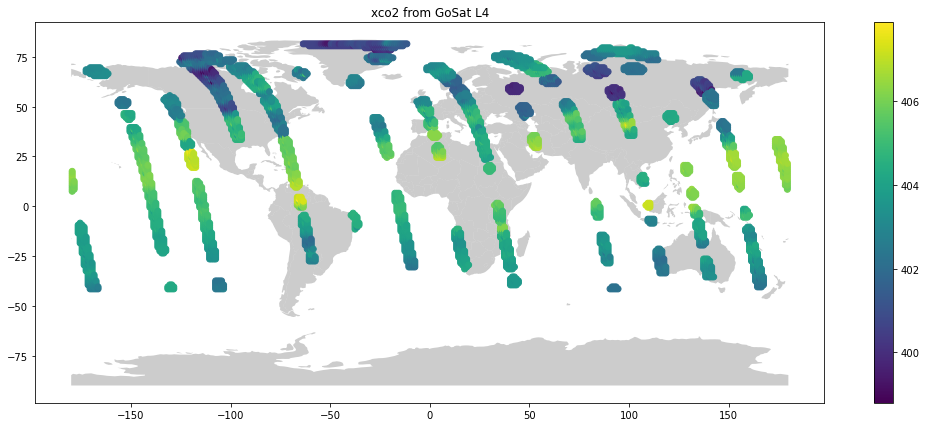

In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(18, 7))
world.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(column='xco2', ax=ax, legend=True)

plt.title('xco2 from GoSat L4')


In [14]:
gdf = geo_df.copy()
gdf = gdf.reset_index()
gdf = gdf.iloc[:,[3,4]]

gdf

,xco2,geometry
0,403.254456,POINT (-170.50000 66.50000)
1,403.268433,POINT (-169.50000 66.50000)
2,403.267242,POINT (-167.50000 65.50000)
3,403.268433,POINT (-166.50000 65.50000)
4,403.432800,POINT (-166.50000 66.50000)
...,...,...
4125,406.309357,POINT (179.50000 17.50000)
4126,406.322083,POINT (179.50000 18.50000)
4127,406.367462,POINT (179.50000 19.50000)
4128,406.364471,POINT (179.50000 20.50000)


In [8]:
import time
start_time = time.time()
gdf.to_file('mayra_l4.shp')

print('Processing time:', time.time()-start_time)

/home/mjt/miniconda3/envs/geoproc/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


KeyboardInterrupt: 